In [37]:
# import libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt
import matplotlib.pyplot as plt



In [44]:
#read data files
fl_1 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_1.csv', index_col='DATE',parse_dates=True)
fl_2 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_2.csv', index_col='DATE',parse_dates=True)
fl_3 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_3.csv', index_col='DATE',parse_dates=True)
fl_4 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_4.csv', index_col='DATE',parse_dates=True)
fl_5 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_5.csv', index_col='DATE',parse_dates=True)
fl_6 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_6.csv', index_col='DATE',parse_dates=True)

#concat files to create Florida Unemployment df
fl_unemployment = pd.concat([fl_1,fl_2,fl_3,fl_4,fl_5,fl_6], axis=1, join='inner')

#rename columns
fl_unemployment.columns = ['Alachua','Baker','Bay','Bradford','Brevard','Broward','Calhoun','Charlotte','Citrus','Clay','Collier','Columbia'
                                ,'DeSoto','Dixie','Duval','Escambia','Flagler','Franklin','Gadsden','Gilchrist','Glades','Gulf','Hamilton','Hardee'
                                ,'Hendry','Hernando','Highlands','Hillsborough','Holmes','Indian River','Jackson','Jefferson','Lafayette','Lake','Lee','Leon'
                                ,'Levy','Liberty','Madison','Manatee','Marion','Martin','Miami-Dade','Monroe','Nassau','Okaloosa','Okeechobee','Orange'
                                ,'Osceola','Palm Beach','Pasco','Pinellas','Polk','Putnam','Santa Rosa','Sarasota','Seminole','St. Johns','St. Lucie','Sumter'
                                ,'Suwawnee','Taylor','Union','Volusia','Wakulla','Walton','Washington' ]

#preview data
display(fl_unemployment.head())
display(fl_unemployment.tail())


,Alachua,Baker,Bay,Bradford,Brevard,Broward,Calhoun,Charlotte,Citrus,Clay,...,St. Johns,St. Lucie,Sumter,Suwawnee,Taylor,Union,Volusia,Wakulla,Walton,Washington
DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01,3.6,3.8,5.9,3.8,3.8,3.6,5.3,4.3,5.8,3.7,...,3.3,4.6,5.5,4.0,4.4,3.6,4.1,3.5,3.6,4.7
2019-02-01,3.0,3.2,4.8,3.3,3.4,3.2,4.5,3.8,5.1,3.2,...,2.8,4.1,5.0,3.5,3.8,3.0,3.6,2.9,3.1,3.9
2019-03-01,3.0,3.2,4.4,3.3,3.3,3.1,4.3,3.8,4.9,3.1,...,2.8,3.9,5.0,3.5,3.6,3.0,3.5,2.9,3.0,3.6
2019-04-01,2.6,2.9,3.7,2.9,3.0,2.8,3.7,3.4,4.5,2.8,...,2.5,3.6,4.6,3.1,3.4,2.7,3.2,2.7,2.7,3.2
2019-05-01,2.8,3.1,3.7,3.1,3.1,3.0,3.6,3.6,4.8,2.9,...,2.5,3.9,4.7,3.2,3.4,2.8,3.4,2.9,2.7,3.2


,Alachua,Baker,Bay,Bradford,Brevard,Broward,Calhoun,Charlotte,Citrus,Clay,...,St. Johns,St. Lucie,Sumter,Suwawnee,Taylor,Union,Volusia,Wakulla,Walton,Washington
DATE,,,,,,,,,,,,,,,,,,,,,
2021-08-01,4.0,4.0,3.9,4.4,4.2,4.9,4.8,4.8,6.1,3.7,...,3.3,5.2,5.9,4.8,5.2,4.1,4.7,3.5,3.7,4.7
2021-09-01,3.5,3.6,3.5,4.0,3.8,4.5,4.5,4.3,5.4,3.4,...,2.9,4.7,5.3,4.5,4.6,3.6,4.3,3.0,3.4,4.2
2021-10-01,3.4,3.6,3.4,3.8,3.6,4.1,4.5,4.0,5.0,3.2,...,2.8,4.4,4.8,4.2,4.4,3.4,4.1,2.9,3.2,4.0
2021-11-01,3.1,3.3,3.3,3.9,3.5,3.9,4.1,3.9,5.0,3.0,...,2.7,4.2,4.8,3.9,4.4,3.2,3.9,2.8,3.1,3.8
2021-12-01,2.8,2.9,3.1,3.4,3.0,3.3,3.6,3.4,4.4,2.7,...,2.3,3.6,4.2,3.4,4.0,2.7,3.4,2.5,2.7,3.5


In [45]:
fl_unemployment_yearly = fl_unemployment.groupby(fl_unemployment.index.year).mean()
fl_unemployment_yearly.head()

,Alachua,Baker,Bay,Bradford,Brevard,Broward,Calhoun,Charlotte,Citrus,Clay,...,St. Johns,St. Lucie,Sumter,Suwawnee,Taylor,Union,Volusia,Wakulla,Walton,Washington
DATE,,,,,,,,,,,,,,,,,,,,,
2019,3.008333,3.175000,3.808333,3.316667,3.266667,3.10,4.058333,3.766667,4.958333,3.108333,...,2.708333,4.033333,4.808333,3.458333,3.683333,3.058333,3.533333,2.958333,2.933333,3.550000
2020,5.725000,5.341667,6.341667,6.341667,7.041667,9.40,5.450000,7.775000,8.925000,5.708333,...,5.491667,8.191667,8.375000,6.025000,6.741667,5.016667,8.100000,4.750000,6.166667,6.166667
2021,3.833333,3.825000,3.983333,4.275000,4.158333,4.95,4.666667,4.491667,5.800000,3.633333,...,3.125000,5.008333,5.450000,4.625000,5.200000,3.883333,4.708333,3.283333,3.633333,4.600000


In [46]:
#pivot data to then join with gdp dataset
fl_unemployment = fl_unemployment.transpose()


In [47]:
#rename DATE column to County
#fl_unemployment = fl_unemployment.rename('County')
fl_unemployment.head()


DATE,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,...,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01
Alachua,3.6,3.0,3.0,2.6,2.8,3.4,3.5,3.2,2.9,2.9,...,3.9,3.7,3.7,4.4,4.3,4.0,3.5,3.4,3.1,2.8
Baker,3.8,3.2,3.2,2.9,3.1,3.6,3.6,3.3,2.9,3.0,...,4.0,3.7,3.5,4.3,4.2,4.0,3.6,3.6,3.3,2.9
Bay,5.9,4.8,4.4,3.7,3.7,3.8,3.7,3.5,3.2,3.1,...,4.3,4.0,3.8,4.3,4.1,3.9,3.5,3.4,3.3,3.1
Bradford,3.8,3.3,3.3,2.9,3.1,3.6,3.7,3.7,3.3,3.2,...,4.4,4.1,4.0,4.7,4.6,4.4,4.0,3.8,3.9,3.4
Brevard,3.8,3.4,3.3,3.0,3.1,3.5,3.5,3.5,3.2,3.1,...,4.4,4.2,4.1,4.6,4.3,4.2,3.8,3.6,3.5,3.0


In [48]:
#get column names to verify data transposed as expected
fl_unemployment.keys()

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [49]:
#rename index from DATE to County
fl_unemployment = fl_unemployment.rename_axis('County')

In [50]:
#ensure changes took place
fl_unemployment.head()

DATE,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,...,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01
County,,,,,,,,,,,,,,,,,,,,,
Alachua,3.6,3.0,3.0,2.6,2.8,3.4,3.5,3.2,2.9,2.9,...,3.9,3.7,3.7,4.4,4.3,4.0,3.5,3.4,3.1,2.8
Baker,3.8,3.2,3.2,2.9,3.1,3.6,3.6,3.3,2.9,3.0,...,4.0,3.7,3.5,4.3,4.2,4.0,3.6,3.6,3.3,2.9
Bay,5.9,4.8,4.4,3.7,3.7,3.8,3.7,3.5,3.2,3.1,...,4.3,4.0,3.8,4.3,4.1,3.9,3.5,3.4,3.3,3.1
Bradford,3.8,3.3,3.3,2.9,3.1,3.6,3.7,3.7,3.3,3.2,...,4.4,4.1,4.0,4.7,4.6,4.4,4.0,3.8,3.9,3.4
Brevard,3.8,3.4,3.3,3.0,3.1,3.5,3.5,3.5,3.2,3.1,...,4.4,4.2,4.1,4.6,4.3,4.2,3.8,3.6,3.5,3.0


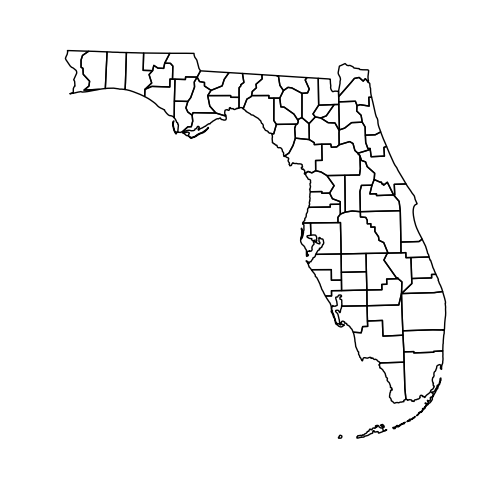

In [53]:
# Load the json file with county coordinates
geoData = gpd.read_file(
    'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson'
)

# Make sure the "id" column is an integer
geoData.id = geoData['id'].astype(int)

# filter data to Florida
florida = geoData.loc[geoData['STATE']=='12']

# Basic plot with just county outlines
gplt.polyplot(
    florida,
    projection=gcrs.AlbersEqualArea()
)
plt.show()


In [52]:
geoData[~geoData.STATE.isin(statesToRemove)]


,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,1021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,1033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."
...,...,...,...,...,...,...,...,...
3216,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ..."
3217,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243..."
3218,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512..."
3219,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891..."


In [43]:
geoData.loc[geoData['STATE']=='12']

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
38,12083,0500000US12083,12,083,Marion,County,1584.546,"POLYGON ((-82.31170 28.96039, -82.42700 29.021..."
39,12087,0500000US12087,12,087,Monroe,County,983.282,"MULTIPOLYGON (((-80.25058 25.34193, -80.25492 ..."
40,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-81.65739 28.55312, -81.65811 28.682..."
41,12111,0500000US12111,12,111,St. Lucie,County,571.926,"POLYGON ((-80.67786 27.20599, -80.67861 27.448..."
42,12119,0500000US12119,12,119,Sumter,County,546.933,"POLYGON ((-81.95419 28.96005, -81.95358 28.820..."
...,...,...,...,...,...,...,...,...
2546,12065,0500000US12065,12,065,Jefferson,County,598.095,"POLYGON ((-84.00739 30.67210, -83.88032 30.665..."
2956,12009,0500000US12009,12,009,Brevard,County,1015.664,"POLYGON ((-80.63131 28.65519, -80.61679 28.634..."
2957,12075,0500000US12075,12,075,Levy,County,1118.206,"POLYGON ((-82.40515 29.33026, -82.40459 29.278..."
2982,12021,0500000US12021,12,021,Collier,County,1998.324,"POLYGON ((-81.56376 26.51332, -81.27177 26.517..."
